In [1]:
cd ../

/home/noahb/workspace/fv3net


In [2]:
from src.data.regrid import *

In [40]:
import xarray as xr
import matplotlib.pyplot as plt

data_2d = xr.open_zarr("data/interim/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute_2d.zarr/")

data_3d = xr.open_zarr("data/interim/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute_3d.zarr/")
data_3d = data_3d.chunk({'time': 1, 'grid_xt': 256, 'grid_yt': 256})

In [42]:
dtemp = total_derivative(data_3d, 'temp')
dq =total_derivative(data_3d, 'qv')

In [46]:
xr.Dataset({'dtemp': dtemp, 'dq': dq}).to_zarr("test.zarr", mode='w')

In [47]:
data = xr.open_zarr("test.zarr")

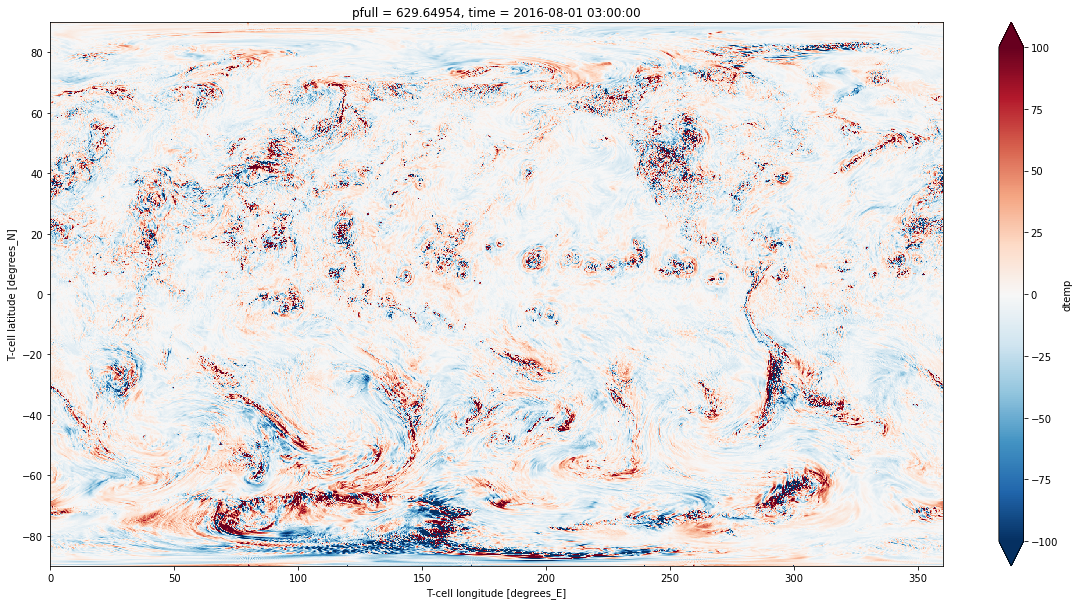

In [49]:
plt.figure(figsize=(20, 10))
(data.dtemp[0,50]*86400).plot(vmax=100)